<a href="https://colab.research.google.com/github/irissu0415/CNN-Model/blob/main/test_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import os
from sklearn.preprocessing import LabelEncoder

In [ ]:
path1 = './drive/MyDrive/Colab_Notebooks/CNN'  # 相對路徑

x = []
y = []

In [ ]:
# 定義ImageDataGenerator
img_gen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True, rotation_range=10, 
                             width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1, zoom_range=0.1)

# 定義ReduceLROnPlateau
learning_rate_function = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

In [ ]:
n = 1
for p in os.listdir(path1):
    path2 = path1 + f'/{p}'
    for i in os.listdir(path2):
        img = cv2.imread(f'{path2}/{i}')
        img = cv2.resize(img, (256) 256))
        # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Cv2讀進來是BGR，轉成RGB
        x.append(np.array(img))
        y.append(str(p))

In [ ]:
# Label encoding
label = LabelEncoder()
y = label.fit_transform(y)
y = to_categorical(y, 4)
x = np.array(x)
x = x / 255

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
img_gen.fit(x_train)
x_size = x.shape[0]
# print(x_size, x.ndim, x[0].shape)
# print(y.shape, y.ndim)

In [ ]:
i = Input(shape=x_train[0].shape)
x = Conv2D(16, (5, 5), strides=1, activation='relu')(i)
x = Conv2D(32, (5, 5), strides=1, activation='relu')(x)
0
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dense(4, activation='softmax')(x)

# model-4: 0.7778(epoch = 300)
# i = Input(shape=x_train[0].shape)
# x = Conv2D(16, (3, 3), strides=1, activation='relu')(i)
# x = MaxPooling2D((2, 2))(x)
# x = Conv2D(16, (3, 3), strides=1, activation='relu')(x)
# x = MaxPooling2D((2, 2))(x)
# x = Conv2D(32, (3, 3), strides=1, activation='relu')(x)
# x = MaxPooling2D((2, 2))(x)

# x = Flatten()(x)
# x = Dense(1024, activation='relu')(x)  # 此model dense越大準確度越高
# x = Dense(4, activation='softmax')(x)

In [ ]:
model = Model(i, x)
batch_size = 32
steps_per_epoch = x_size // batch_size
model.compile(optimizer='adam', loss='categorical_crossentropy',  # for 2D y
              metrics=['accuracy'])

In [ ]:
# training model
r = model.fit_generator(img_gen.flow(x_train, y_train, batch_size=batch_size), epochs=300,
                        validation_data=(x_test, y_test), verbose=1, steps_per_epoch=steps_per_epoch, callbacks=[learning_rate_function])

Epoch 1/300


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


 2/50 [>.............................] - ETA: 3s - loss: 1.6576 - accuracy: 0.2031 

50/50 [==============================] - 1s 14ms/step - loss: 1.7144 - accuracy: 0.2059 - val_loss: 2.8250 - val_accuracy: 0.1667 - lr: 0.0010


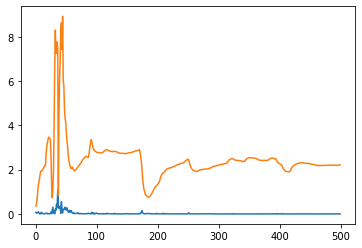

In [ ]:
# 每迭代繪製損失
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.show()

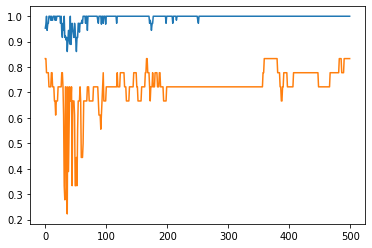

In [ ]:
# 每迭代繪製精準度
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.show()

In [ ]:
# 總結模型各層形狀與使用參數
model.summary()

Model: "model_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_24 (InputLayer)       [(None, 28, 28, 3)]       0         
                                                                 
 conv2d_62 (Conv2D)          (None, 24, 24, 16)        1216      
                                                                 
 conv2d_63 (Conv2D)          (None, 20, 20, 32)        12832     
                                                                 
 flatten_20 (Flatten)        (None, 12800)             0         
                                                                 
 dense_40 (Dense)            (None, 256)               3277056   
                                                                 
 dense_41 (Dense)            (None, 4)                 1028      
                                                                 
Total params: 3,292,132
Trainable params: 3,292,132
Non-tr